In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy 

In [28]:
mask_file = '/storage/shared/oceanparcels/input_data/NEMO_Ensemble/GRID/NATL025-CJMenobs01_byte_mask.nc'
mask = xr.open_dataset(mask_file, decode_times=False)

In [29]:
file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/Cape_Hatteras/std_001/Cape_Hatteras_std001_m001.zarr"

In [30]:
pset = xr.open_zarr(file_path)

In [31]:
pset

<xarray.Dataset> Size: 4GB
Dimensions:     (trajectory: 74500, obs: 1000)
Coordinates:
  * obs         (obs) int32 4kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * trajectory  (trajectory) int64 596kB 0 1 2 3 4 ... 74496 74497 74498 74499
Data variables:
    hexbin_id   (trajectory, obs) float32 298MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    lat         (trajectory, obs) float64 596MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    lon         (trajectory, obs) float64 596MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] 596MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    u           (trajectory, obs) float32 298MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    v           (trajectory, obs) float32 298MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    w           (trajectory, obs) float32 298MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    z           (trajectory, obs) float64 596MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        EnsembleParticleAdvectionRK4_3DSampleFieldKeepInO...
    parcels_mesh:           spherical
    parcels_version:        3.0.2

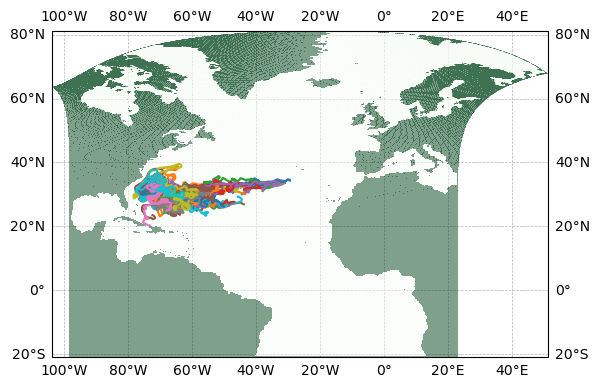

In [34]:
# Plot NA_domain on a map
depth = 0
fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
# ax.set_extent([-80, -70, 33, 37], crs=cartopy.crs.PlateCarree())
# ax.coastlines()
ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5)
# hexfunc.pcolorhex(ax, grid_raw, colors='r', draw_edges=True, fill_polygons=False)
ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0,depth,:,:], cmap='Greens_r', alpha=0.5)
for i in range(100):
    # ax.scatter(pset.lon[i,0], pset.lat[i,0], s=1)
    ax.plot(pset.lon[i,:], pset.lat[i,:])

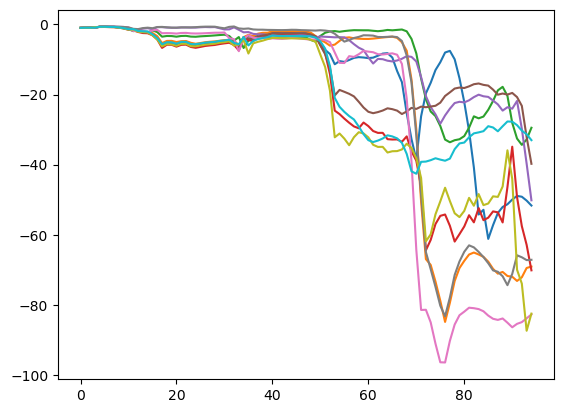

In [23]:
for i in range(10):
    plt.plot(-pset.z[i,:])